# Advanced Regression Assignment - Bike Sharing Case Study
## Contributor: Debarshi Chakraborty
### 27-Apr-2023
### EPGP in ML & AI - December 2022 batch

#### Problem Statement
> A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file - train.csv

> The company is looking at prospective properties to buy to enter the market. They are expecting to get a prediction the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:
    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.**


#### Approach:
> We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

>Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [13]:
## Load the csv file. Also, preventing 'NA' to be read as 'NaN' by pandas
df = pd.read_csv('train.csv', keep_default_na=False)

## View the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [14]:
## Check the dimensions
print("Number of Rows = ", df.shape[0])
print("Number of Columns = ", df.shape[1])

Number of Rows =  1460
Number of Columns =  81


## Data Cleaning

In [15]:
## Check the info of our data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [16]:
#Looking at the data types of all columns and comparing them with the data description of each columns,
#we deduce that the types of following columns have to be changed:
# Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
# Column LotFrontage and MasVnrArea needs to be converted to numeric type.
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')
print(df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes)

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object


## Data Exploration / Analysis

In [17]:
## View the statistical description of the numerical columns
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### The mean of few variables like 2ndFlrSF are very different from their median values, so they have skewed distributions.

In [23]:
## Check for missing values
df.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
MasVnrArea        8
Id                0
KitchenAbvGr      0
GarageYrBlt       0
dtype: int64

#### There are only two columns containing missing values : LotFrontage and MasVnrArea

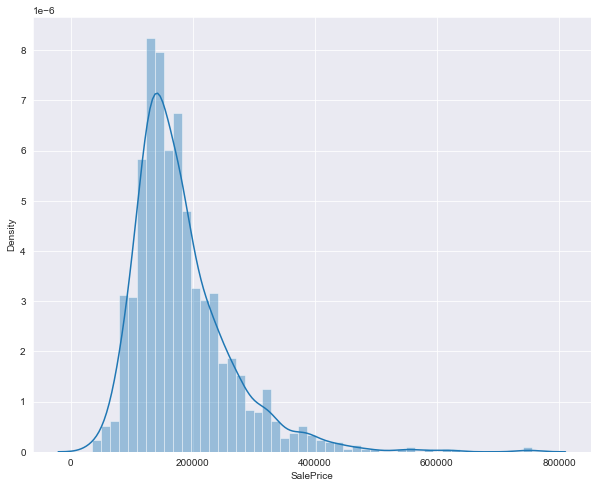

In [25]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

**Skewness** assesses the extent to which a variable’s distribution is symmetrical. If the distribution of responses for a variable stretches toward the right or left tail of the distribution, then the distribution is characterized as skewed. A negative skewness indicates a greater number of larger values, whereas a positive skewness indicates a greater number of smaller values. The rule of thumb seems to be: 
>> If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. 
>> If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. 
>> If the skewness is less than -1 or greater than 1, the data are highly skewed.

**Kurtosis** is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center). A positive value for the kurtosis indicates a distribution more peaked than normal. In contrast, a negative kurtosis indicates a shape flatter than normal. The general guideline is that 
>> if the kurtosis is greater than +2, the distribution is too peaked. 
>> A kurtosis of less than −2 indicates a distribution that is too flat. 

***When both skewness and kurtosis are close to zero, the pattern of responses is considered a normal distribution***

In [27]:
## Also let's check the skewness and kurtosis
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


* **The skewness is greater than 1, so the target variable is highly skewed.**
* **The kurtosis is greater than 2, so the distribution of target variable is highly peaked.**

In [28]:
# So, we will log transform our target variable. and again check the skewness and kurtosis
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

0.12133506220520406
0.8095319958036296


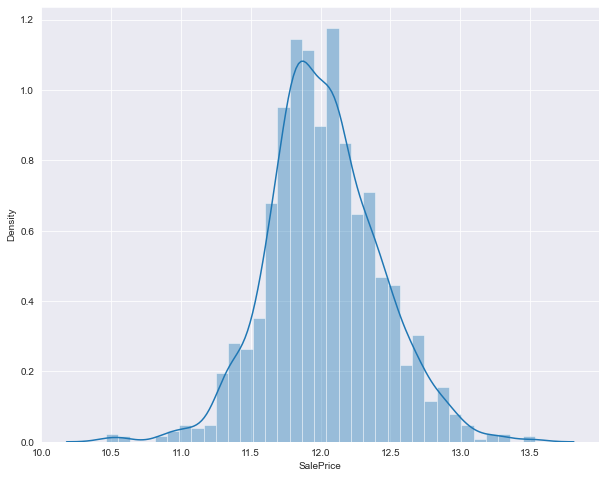

In [29]:
## Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

**Log transformation has made target variable normally distributed**
* **Both skewness and kurtosis are less than 1 now**

#### Divide the dataframe df into numerical and categorical columns for further EDA

In [31]:
## Extract numerical columns
df_numbers = df.select_dtypes(include=['int64', 'float64'])
df_numbers.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [32]:
## Extract categorical columns
df_category = df.select_dtypes(include='object')
df_category.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,2003,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


#### Distribution plots and Box plot on numerical columns

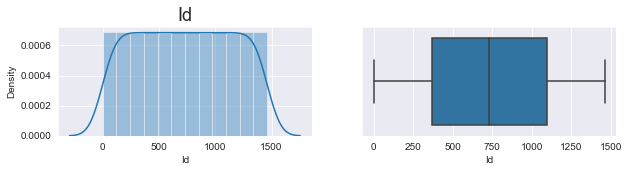

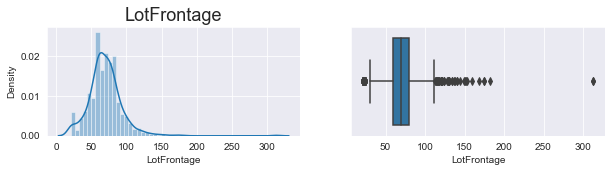

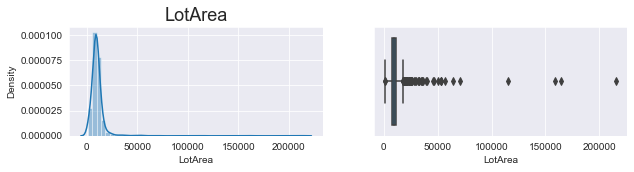

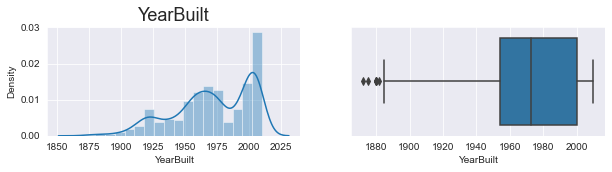

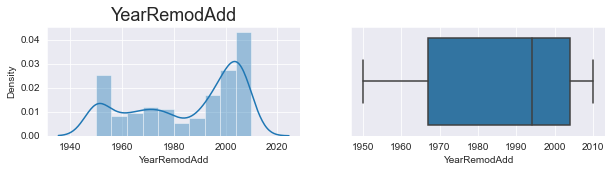

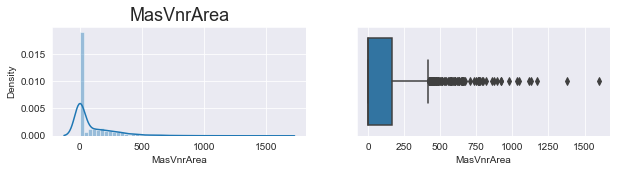

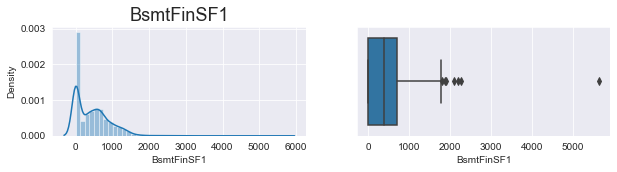

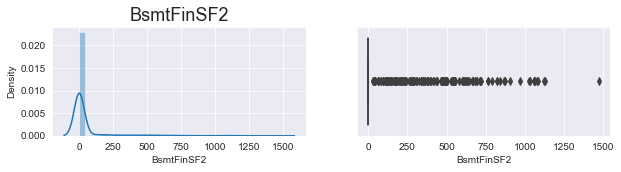

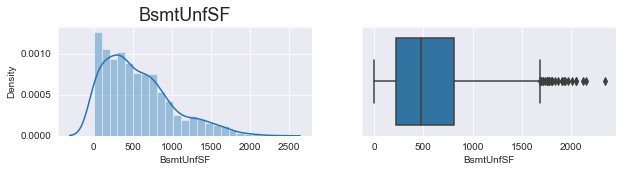

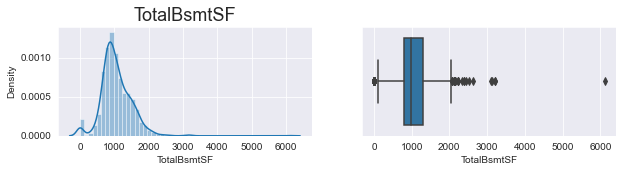

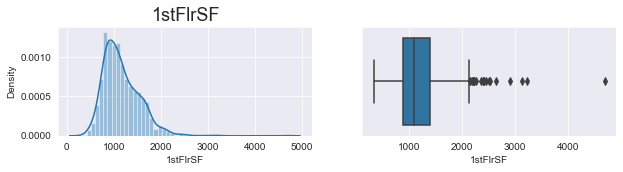

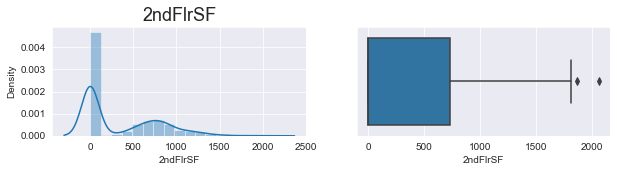

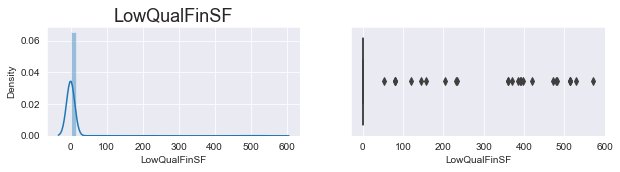

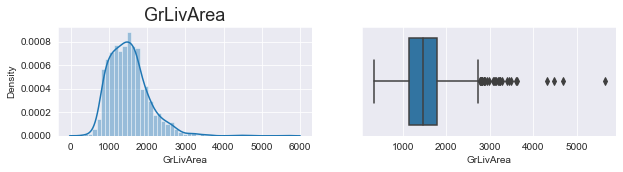

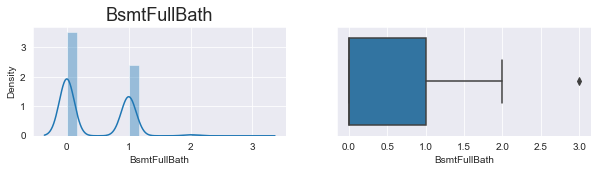

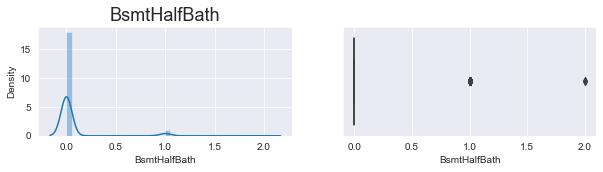

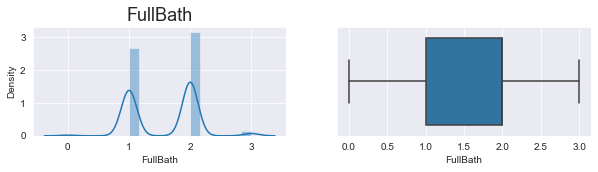

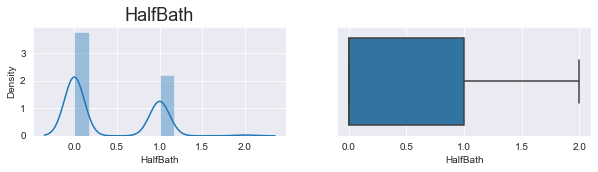

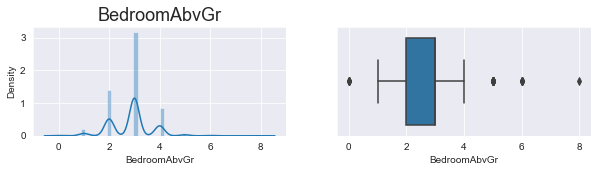

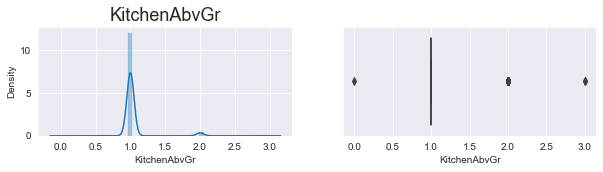

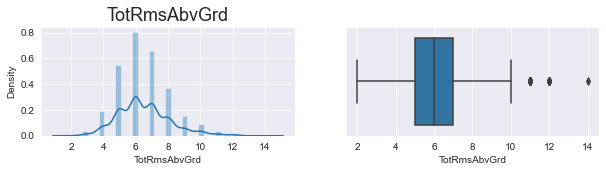

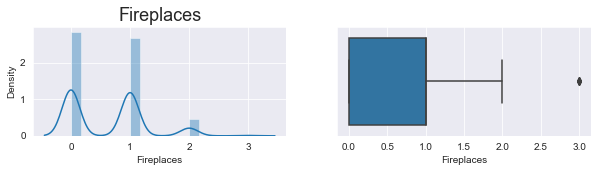

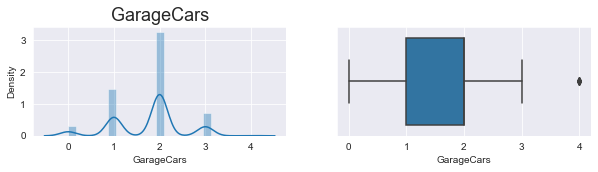

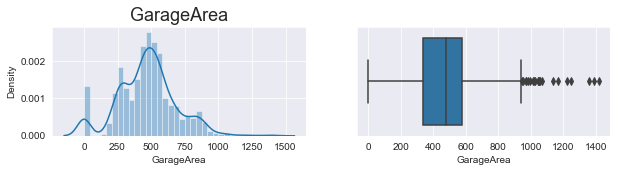

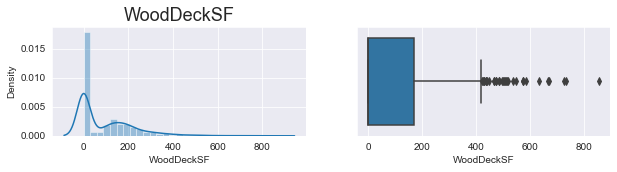

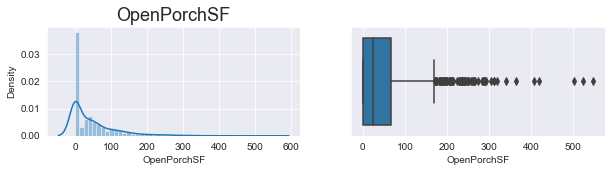

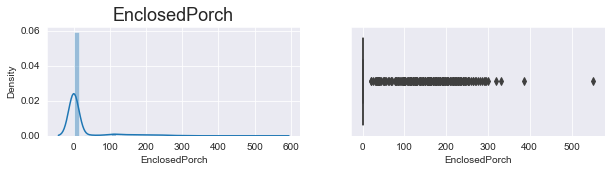

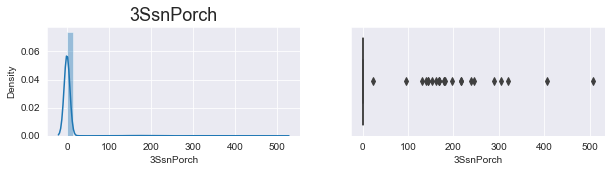

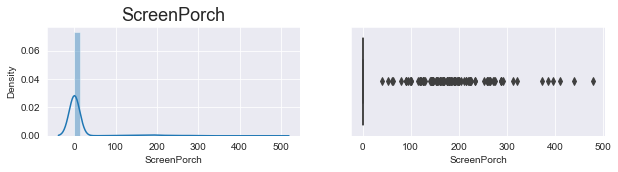

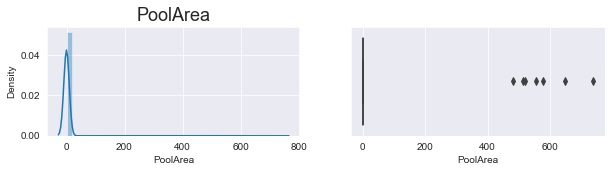

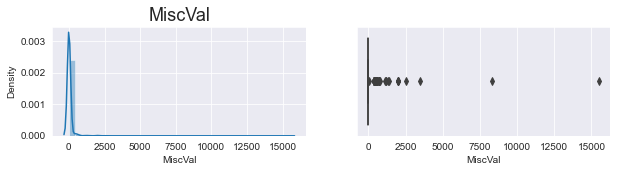

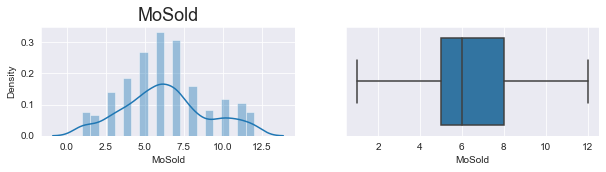

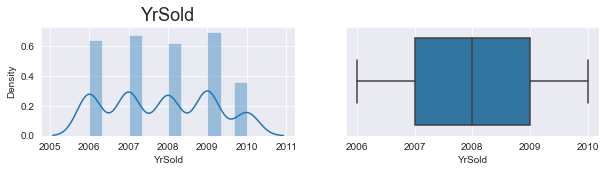

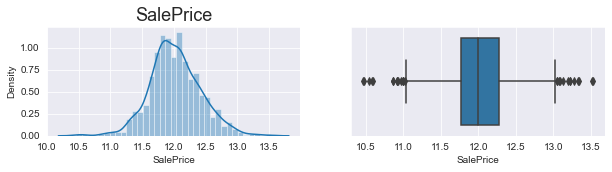

In [37]:
for col in df_numbers.columns:
    plt.figure(figsize=(10,2))   
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_numbers[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()    

* **Many of the numerical columns are having non-normal distribution**
* **Most of the columns have outliers.**


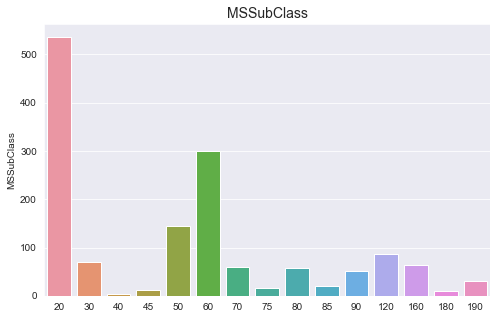

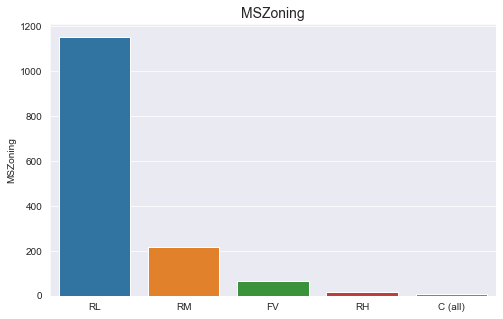

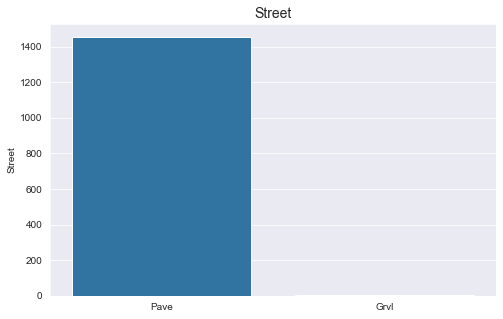

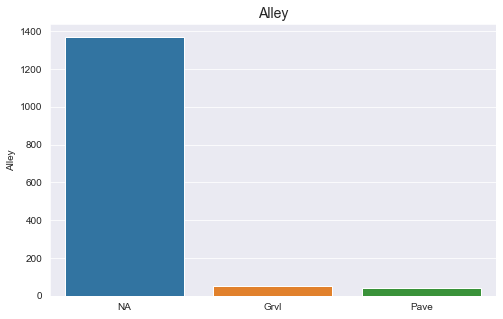

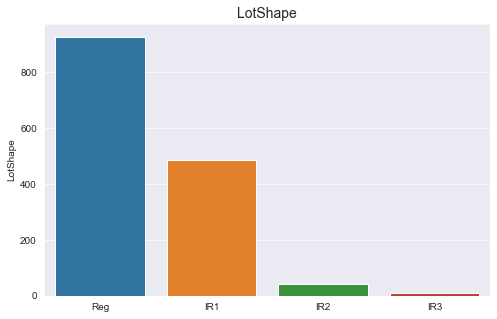

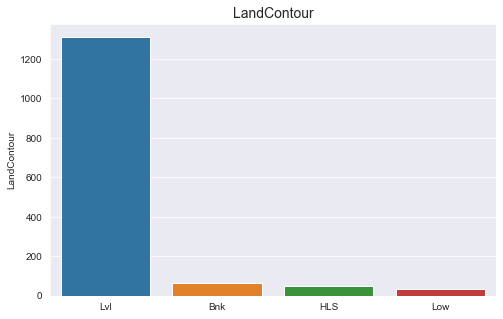

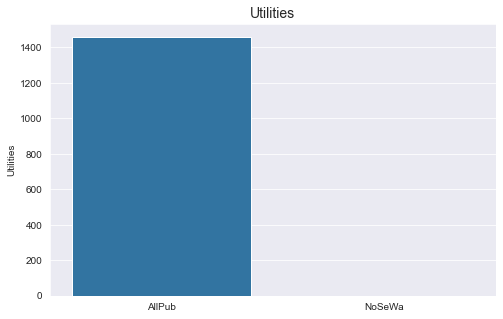

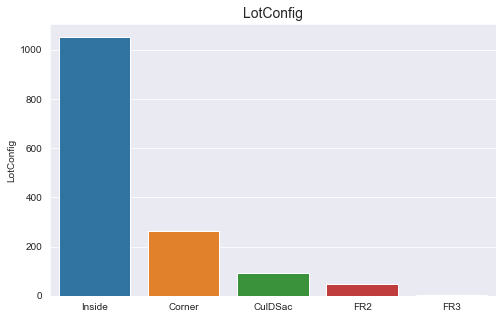

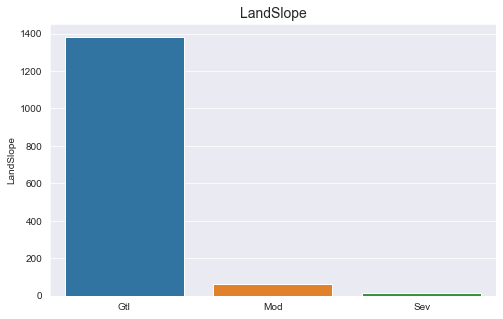

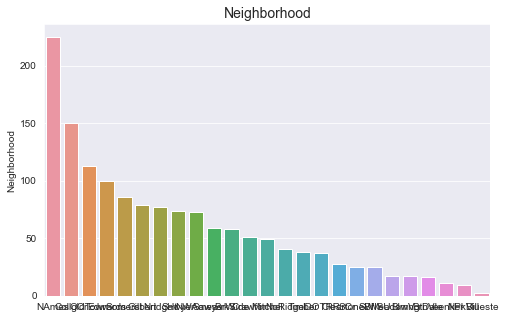

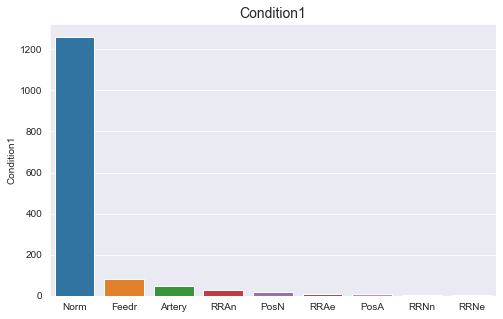

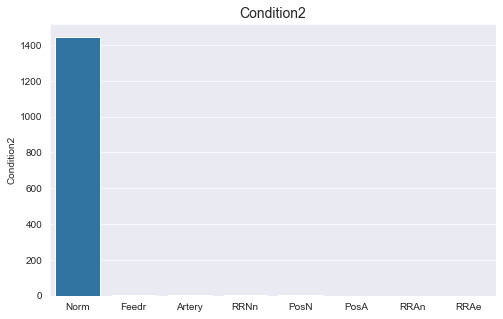

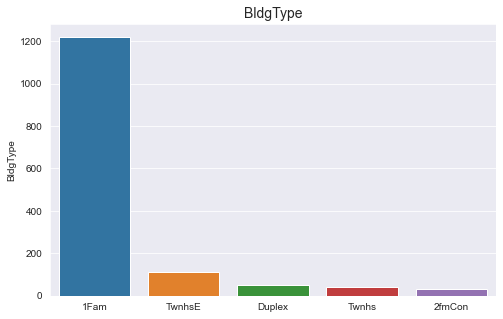

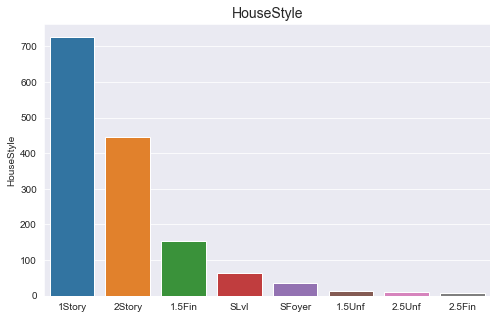

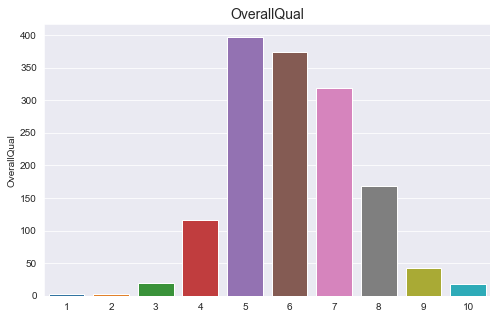

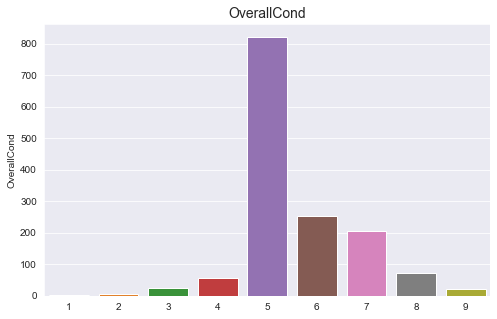

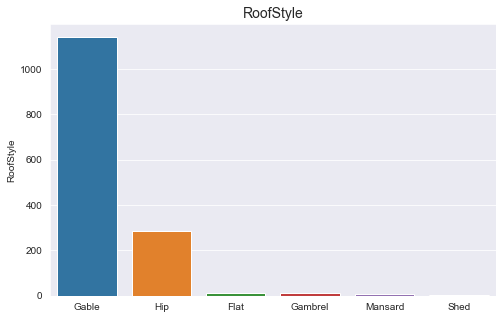

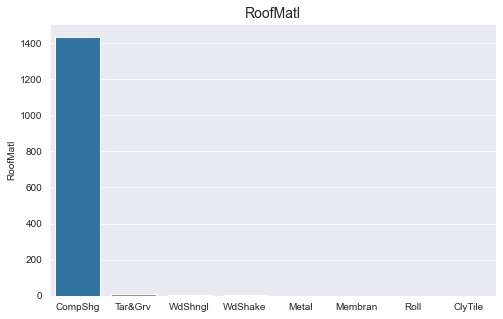

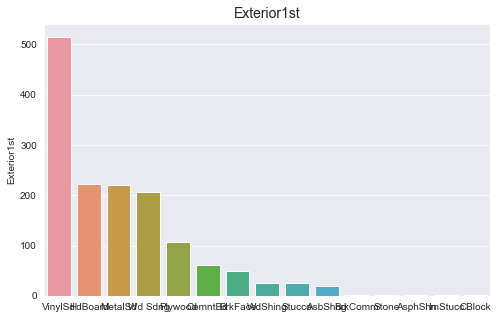

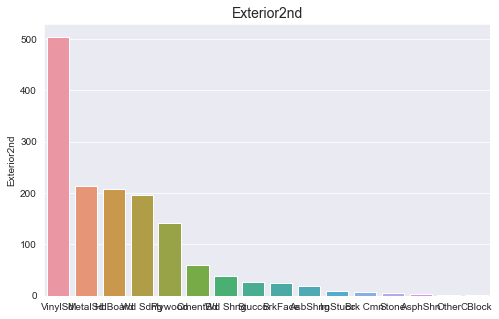

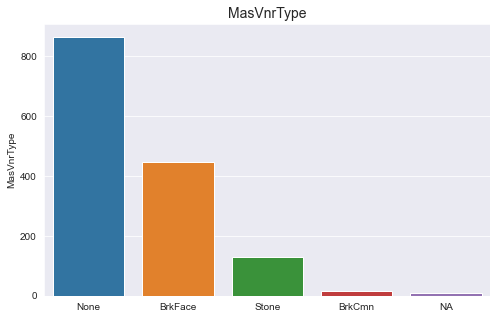

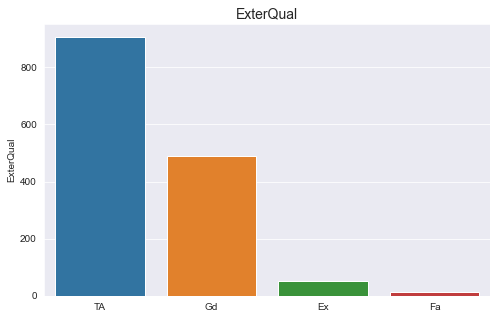

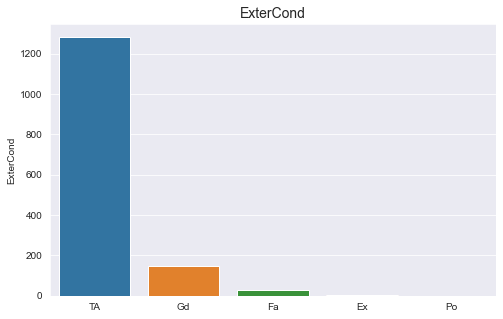

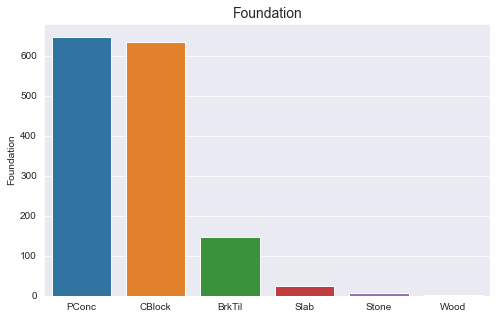

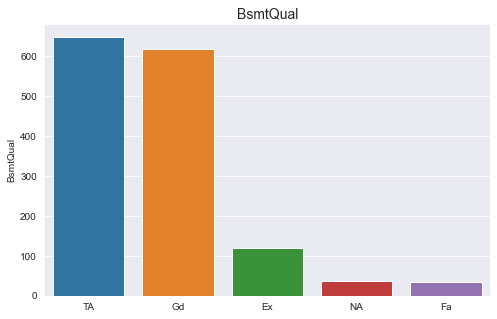

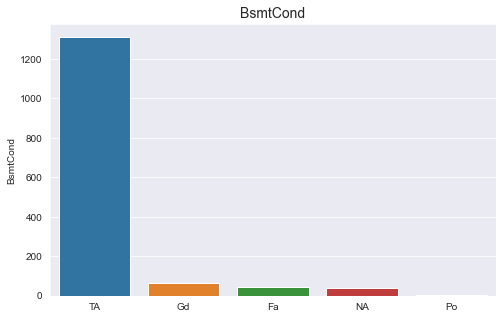

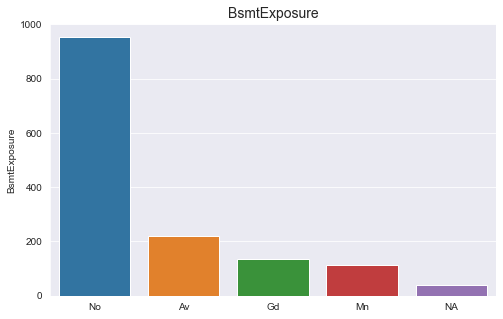

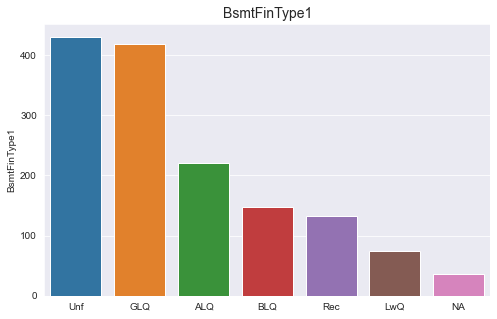

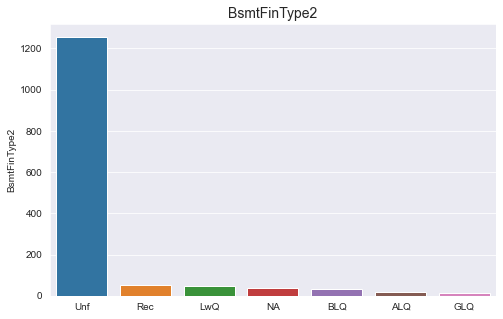

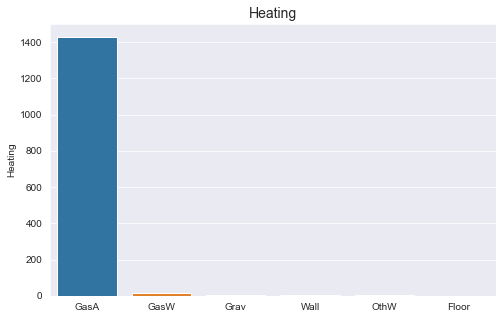

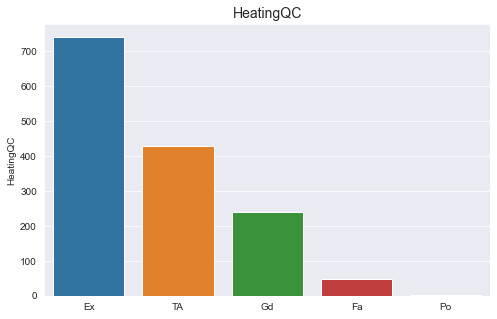

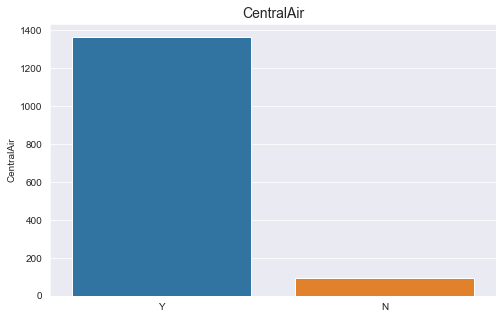

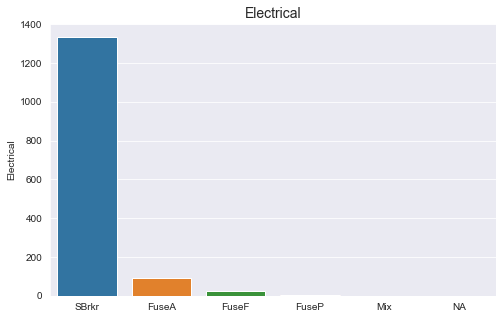

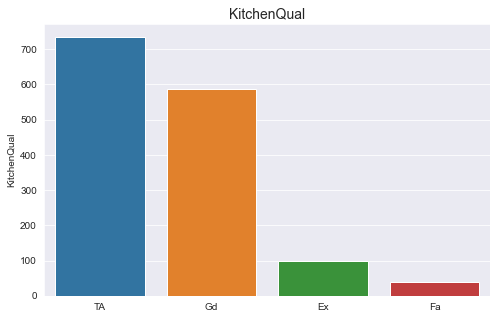

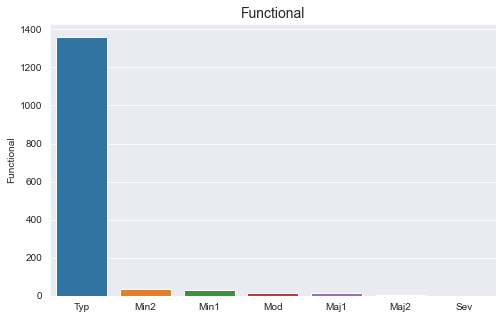

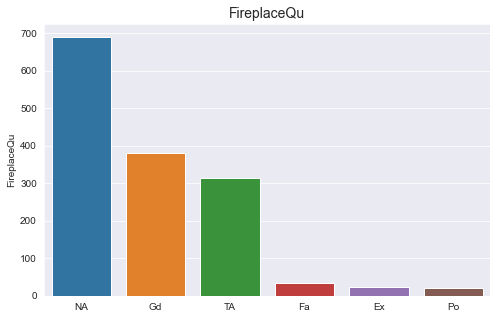

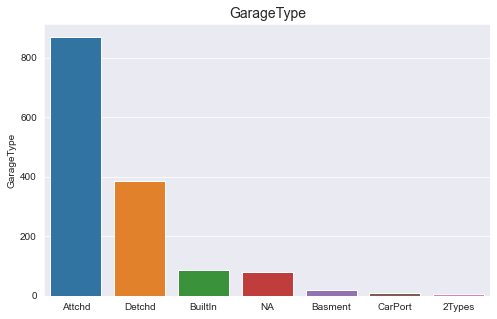

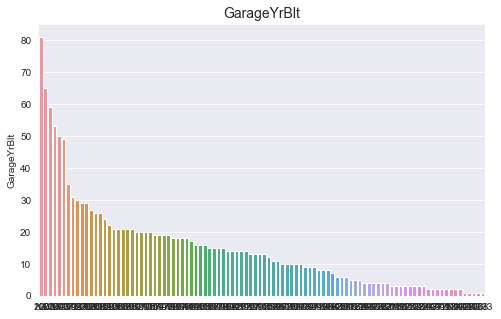

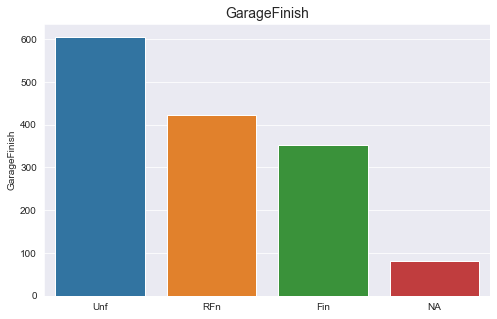

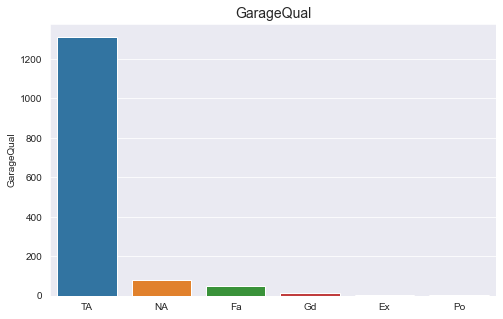

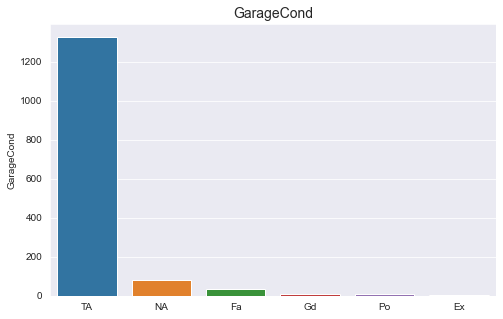

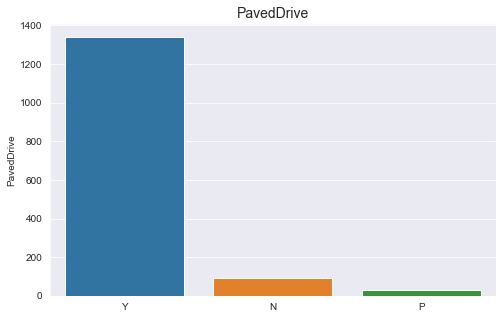

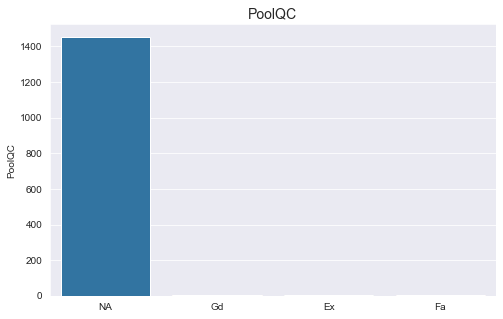

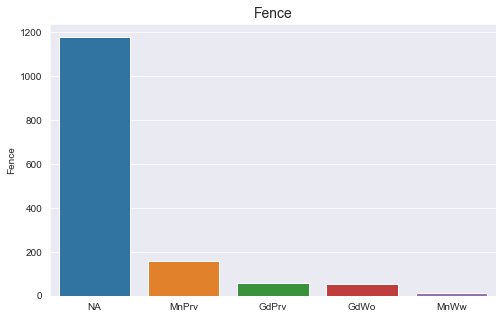

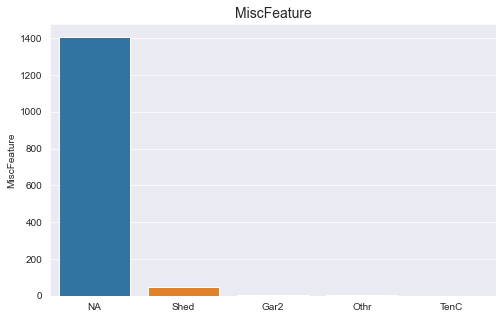

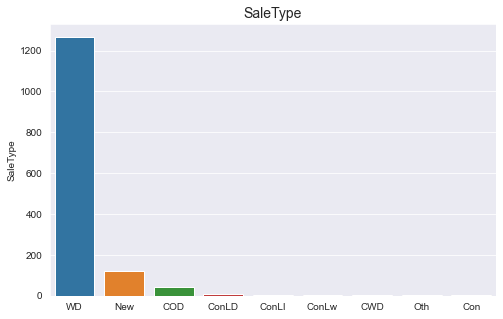

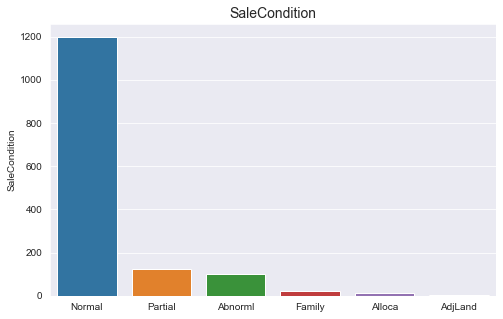

In [38]:
## Visualizing the levels of categorical columns using bar plots
for col in df_category.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 14})
    sns.barplot(df_category[col].value_counts().index, df_category[col].value_counts())
    plt.show()

#### Bivariate Analysis -- Correlation

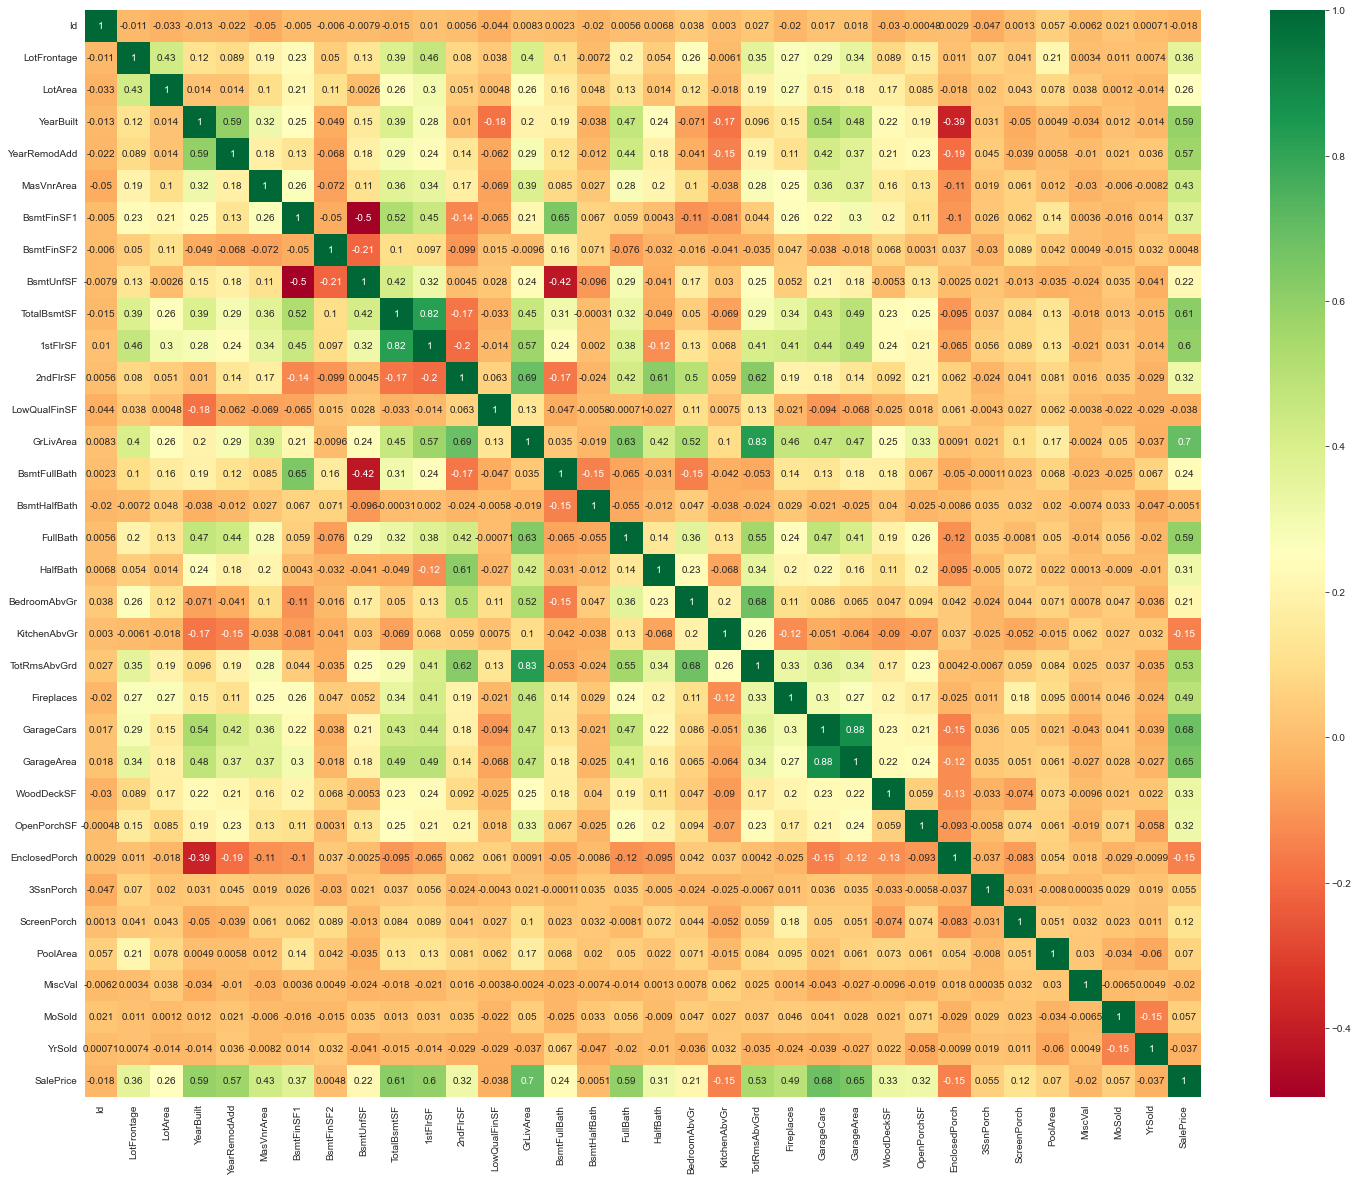

In [42]:
plt.figure(figsize=(25,20))
sns.heatmap(df_numbers.corr(), annot=True, cmap='RdYlGn');

* **Many columns are highly correlated with each other.**
* **Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.**
* **As there is multicollinearity among predictors in our data, it would be good to use Advanced Regression concepts**

### Data Preprocessing

In [43]:
## Create new column for the age of the house and dropping the two columns
df['Age'] = df['YrSold'] - df['YearBuilt']
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,WD,Normal,12.429216,8


In [44]:
## Earlier we saw there are two variables that have missing values. 
## Since they are numerical, we will replace them with their mean
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
## Again check for missing values
df.isna().sum().sort_values(ascending=False).head()

Id             0
MSSubClass     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

### Dummy Variable Creation

In [45]:
## Again seperate the variables into numeric and category, as we treated the main df
df_numbers = df.select_dtypes(include=['int64', 'float64'])
df_category = df.select_dtypes(include='object')

In [46]:
## encoding the categorical columns
df_category_en = pd.get_dummies(df_category, drop_first=True)
df_category_en.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,GarageYrBlt_1939,Gara

In [48]:
## Check the new dimensions
print(df_category_en.shape)

(1460, 353)


### Outlier treatment

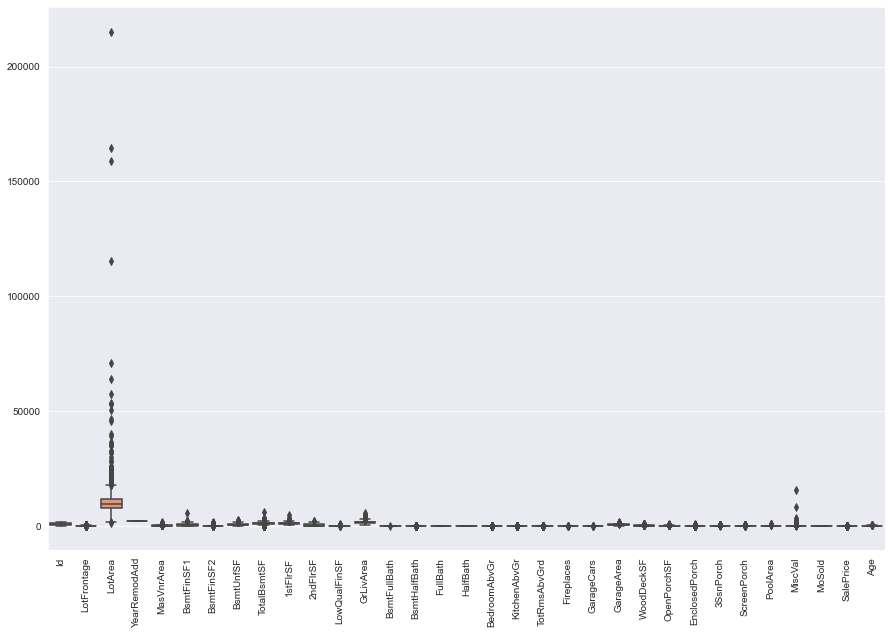

In [52]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
sns.boxplot(data=df_numbers);

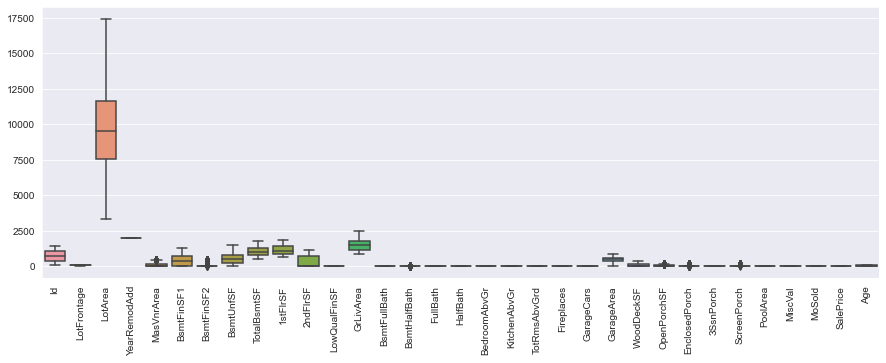

In [54]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_numbers.columns:
    df_numbers[col][df_numbers[col] <= df_numbers[col].quantile(0.05)] = df_numbers[col].quantile(0.05)
    df_numbers[col][df_numbers[col] >= df_numbers[col].quantile(0.95)] = df_numbers[col].quantile(0.95)
    
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(data=df_numbers);

### Bringing back the dataframe together, after the treatment. Our data is ready to be modelled !

In [55]:
## Concatenate the outlier treated numerical columns with encoded categorical columns
df = pd.concat([df_numbers, df_category_en], axis=1)
## View the first few rows of our dataframe
df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918

## MODEL BUILDING

#### Split the Data into Dependent and Independent variables

In [56]:
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_

In [57]:
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [59]:
## Splitting X and y into 75% train data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
## View dimensions of train data
print('[X] and [y] train set size:')
print(X_train.shape)
print(y_train.shape)
## View dimensions of test data
print('[X] and [y] test set size:' )
print(X_test.shape)
print(y_test.shape)

[X] and [y] train set size:
(1095, 384)
(1095,)
[X] and [y] test set size:
(365, 384)
(365,)


####  Scaling numerical columns

In [60]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols
## Create a scaling instance
scaler = MinMaxScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [61]:
print(X_train[num_cols])

      LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
1023     0.102974  0.000000      0.982456    0.030702    0.012559    0.000000   
810      0.617661  0.484527      0.859649    0.217105    0.520408    0.951996   
1384     0.352965  0.407846      0.000000    0.000000    0.160126    0.000000   
626      0.500753  0.640872      0.491228    0.000000    0.000000    0.000000   
813      0.573545  0.456837      0.140351    0.532895    0.477237    0.000000   
839      0.500018  0.600046      0.789474    0.000000    0.276295    0.000000   
370      0.500753  0.341176      0.877193    0.000000    0.000000    0.000000   
54       0.352965  0.271098      0.087719    0.000000    0.301413    0.000000   
534      0.558840  0.407562      0.947368    0.000000    0.000000    0.000000   
785      0.500753  0.459677      0.298246    0.000000    0.197017    1.000000   
312      0.426492  0.318385      0.000000    0.000000    0.397959    0.000000   
1174     0.647072  0.940355 

### RIDGE regression

* **Define a function to print the following metrics**
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)

In [64]:
def show_metrics(y_train, y_train_pred, y_test, y_pred):
        ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

#### Defining the Alpha (λ) params - possible values.

In [65]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [66]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha
ridge = Ridge()

# cross validation
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 6.0}

In [69]:
## View the results of cross validation search
print(ridgeCV.cv_results_)

{'mean_fit_time': array([0.19387431, 0.15065074, 0.05137496, 0.04458566, 0.04968801,
       0.04879556, 0.09689522, 0.06204   , 0.05033793, 0.06352024,
       0.06342907, 0.06977673, 0.0563993 , 0.07900405, 0.04897304,
       0.03883705, 0.06692243, 0.05175085, 0.0520647 , 0.05450501,
       0.03820601, 0.04450755, 0.03657303, 0.05518665, 0.0566556 ,
       0.04343643, 0.04925327, 0.0380899 ]), 'std_fit_time': array([0.00983239, 0.0828439 , 0.01065678, 0.00752082, 0.01916705,
       0.00170734, 0.02411449, 0.00500801, 0.00424931, 0.01680263,
       0.01836165, 0.01349149, 0.01598936, 0.05353206, 0.0118168 ,
       0.00355612, 0.03298266, 0.02511826, 0.02501515, 0.01114512,
       0.00285469, 0.00877423, 0.00847103, 0.01400938, 0.00951776,
       0.00879083, 0.01294423, 0.0044842 ]), 'mean_score_time': array([0.00988526, 0.01032948, 0.00732579, 0.00797467, 0.0126955 ,
       0.03638501, 0.02035356, 0.01286039, 0.01065531, 0.01166644,
       0.01224041, 0.01404915, 0.01048317, 0.00954614

In [70]:
# Create a ridge regreesion instance with optimum value alpha=6
ridge = Ridge(alpha=6)

In [71]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=6)

In [72]:
## View the coefficients of ridge regression fitted model
print(ridge.coef_)

[ 2.96956001e-02  7.29162262e-02  6.29527884e-02 -2.43689286e-03
  6.66302983e-02  9.45189004e-03  2.99818282e-03  1.18652729e-01
  8.70020757e-02  9.10849560e-02  0.00000000e+00  1.88438015e-01
  1.62742964e-02 -5.20155731e-03  3.30374645e-02  3.01975721e-02
  3.01177104e-02  0.00000000e+00  1.36901309e-02  4.81589455e-02
  6.22540729e-02  6.36026092e-02  3.97619457e-02  2.55074989e-02
  6.63340401e-03  0.00000000e+00  3.72504611e-02  0.00000000e+00
  0.00000000e+00  7.91102024e-04 -9.31860630e-02 -5.37190661e-02
  5.18158940e-03 -1.57638326e-03  1.80561563e-03  1.23146203e-02
  4.07051498e-02  3.44002664e-02 -6.61320161e-03  3.73488178e-03
 -3.67514223e-02 -4.63457624e-03 -4.90257472e-02 -7.95198930e-03
 -2.05354740e-02  4.06336539e-02  1.51087108e-02  1.51978849e-02
 -2.51857303e-02 -1.27374896e-02 -1.43337258e-02  2.99874958e-02
  1.47794658e-02 -2.11981509e-02 -7.23157572e-04  4.05860593e-02
  2.23999783e-02  2.68595933e-02 -2.43575254e-02  2.41609309e-02
 -2.84341615e-02 -5.84263

In [73]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [74]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 7.69
RSS (Test) = 3.74
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


In [75]:
## Now, we will plot R2 Score against different values of alpha for both train and test sets
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.193874,0.009832,0.009885,0.004883,0.0001,{'alpha': 0.0001},-0.085339,-0.109973,-0.114736,-0.091803,-0.094388,-0.099248,0.011202,26,-0.049296,-0.046735,-0.047411,-0.048814,-0.050821,-0.048615,0.001439
1,0.150651,0.082844,0.010329,0.004338,0.001,{'alpha': 0.001},-0.085037,-0.109167,-0.112634,-0.091691,-0.091775,-0.098061,0.010820,25,-0.049341,-0.046780,-0.047496,-0.048842,-0.050875,-0.048667,0.001435
2,0.051375,0.010657,0.007326,0.000826,0.01,{'alpha': 0.01},-0.083256,-0.107008,-0.108658,-0.090953,-0.086489,-0.095273,0.010556,24,-0.049691,-0.047082,-0.047974,-0.049105,-0.051120,-0.048994,0.001394
3,0.044586,0.007521,0.007975,0.001090,0.05,{'alpha': 0.05},-0.081306,-0.103274,-0.104936,-0.089083,-0.083748,-0.092469,0.009842,23,-0.050614,-0.047378,-0.048805,-0.049825,-0.051578,-0.049640,0.001452
4,0.049688,0.019167,0.012696,0.004457,0.1,{'alpha': 0.1},-0.080270,-0.100490,-0.101841,-0.087669,-0.082249,-0.090504,0.009046,21,-0.051195,-0.047637,-0.049388,-0.050285,-0.051994,-0.050100,0.001510
5,0.048796,0.001707,0.036385,0.027067,0.2,{'alpha': 0.2},-0.078759,-0.096898,-0.097510,-0.086239,-0.080516,-0.087984,0.007926,20,-0.051885,-0.048103,-0.050181,-0.050776,-0.052599,-0.050709,0.001551
6,0.096895,0.024114,0.020354,0.014183,0.3,{'alpha': 0.3},-0.077581,-0.094574,-0.094848,-0.085370,-0.079371,-0.086349,0.007300,19,-0.052349,-0.048514,-0.050798,-0.051119,-0.053095,-0.051175,0.001568
7,0.062040,0.005008,0.012860,0.002320,0.4,{'alpha': 0.4},-0.076785,-0.092911,-0.092929,-0.084710,-0.078504,-0.085168,0.006857,18,-0.052710,-0.048872,-0.051305,-0.051416,-0.053506,-0.051562,0.001576
8,0.050338,0.004249,0.010655,0.001073,0.5,{'alpha': 0.5},-0.076134,-0.091685,-0.091481,-0.084200,-0.077795,-0.084259,0.006559,16,-0.053014,-0.049189,-0.051726,-0.051678,-0.053841,-0.051889,0.001577
9,0.063520,0.016803,0.011666,0.002981,0.6,{'alpha': 0.6},-0.075536,-0.090711,-0.090332,-0.083764,-0.077183,-0.083505,0.006357,15,-0.053277,-0.049473,-0.052080,-0.051911,-0.054143,-0.052177,0.001579


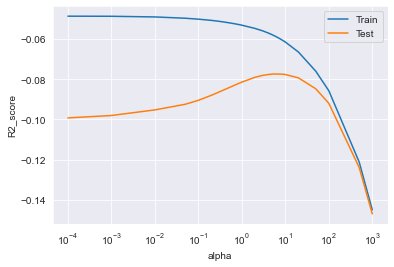

In [76]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

* **As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.**
* **From graph also, it is apparent that the optimal value of alpha peaks around 6**

### LASSO regression

In [77]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha
lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [79]:
## View the results of cross validation search
print(lassoCV.cv_results_)

{'mean_fit_time': array([0.29109287, 0.08852453, 0.03890572, 0.03872643, 0.05274019,
       0.03303676, 0.03379407, 0.03600969, 0.04147224, 0.04292588,
       0.0356822 , 0.04819837, 0.03578711, 0.0322051 , 0.0342886 ,
       0.02883034, 0.03007293, 0.06836109, 0.04728198, 0.03033848,
       0.0548049 , 0.0302772 , 0.08473434, 0.03062243, 0.04717746,
       0.03983073, 0.05885463, 0.03443637]), 'std_fit_time': array([0.06748682, 0.03249534, 0.01022732, 0.0191915 , 0.02266457,
       0.01340081, 0.01228961, 0.01446962, 0.02041248, 0.02541855,
       0.01026944, 0.02576016, 0.01203623, 0.0140999 , 0.0133124 ,
       0.00385987, 0.0091436 , 0.05692212, 0.01812092, 0.00999143,
       0.03957197, 0.00611548, 0.08169277, 0.00434582, 0.02125419,
       0.00982567, 0.02788736, 0.00833257]), 'mean_score_time': array([0.0134294 , 0.01445251, 0.0159143 , 0.00785675, 0.00783119,
       0.00757332, 0.01076365, 0.01095624, 0.00887723, 0.00737143,
       0.00841336, 0.00617971, 0.00878072, 0.00657706

In [80]:
# Create a ridge regreesion instance with optimum value alpha=0.001
# Fit the model on training data, AND
## View the coefficients of lasso fitted model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 2.09041013e-03  8.13361455e-02  7.10584214e-02  0.00000000e+00
  7.03991185e-02  0.00000000e+00 -0.00000000e+00  1.37154050e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.82628543e-01
  1.73964977e-02  0.00000000e+00  1.50712877e-02  2.07505166e-02
  5.00809047e-04  0.00000000e+00  0.00000000e+00  4.73756057e-02
  8.51271659e-02  5.99079365e-02  3.08737215e-02  1.89162556e-02
  0.00000000e+00  0.00000000e+00  3.10036085e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.04556617e-01 -1.67706858e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.62171879e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.47664173e-02 -0.00000000e+00 -4.83276268e-02 -0.00000000e+00
 -0.00000000e+00  4.84767083e-03 -0.00000000e+00  0.00000000e+00
 -4.81249224e-02 -0.00000000e+00 -0.00000000e+00  3.16599286e-04
  0.00000000e+00 -0.00000000e+00 -4.70721037e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.72265326e-02
 -0.00000000e+00  0.00000

In [81]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [82]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.92
RSS (Train) = 10.61
RSS (Test) = 3.61
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [83]:
## Now, we will plot R2 Score against different values of alpha for both train and test sets
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
print(lassoCV_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.291093      0.067487         0.013429        0.009190      0.0001   
1        0.088525      0.032495         0.014453        0.004953       0.001   
2        0.038906      0.010227         0.015914        0.016436        0.01   
3        0.038726      0.019191         0.007857        0.001142        0.05   
4        0.052740      0.022665         0.007831        0.002649         0.1   
5        0.033037      0.013401         0.007573        0.002053         0.2   
6        0.033794      0.012290         0.010764        0.005686         0.3   
7        0.036010      0.014470         0.010956        0.006261         0.4   
8        0.041472      0.020412         0.008877        0.004309         0.5   
9        0.042926      0.025419         0.007371        0.001850         0.6   
10       0.035682      0.010269         0.008413        0.002375         0.7   
11       0.048198      0.025760         

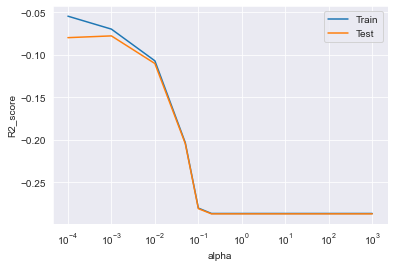

In [84]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

* **As the value of alpha increases, we see a decrease in both train and test error.**
* **From graph also, it is apparent that the optimal value of alpha peaks around 0.001**

### Comparing the two models

In [85]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.942777,0.921090
R2 Score (Test),0.920291,0.923142
RSS (Train),7.692507,10.607922
RSS (Test),3.740140,3.606358
MSE (Train),0.007025,0.009688
MSE (Test),0.010247,0.009880
RMSE (Train),0.083816,0.098426
RMSE (Test),0.101227,0.099400


In [95]:
## Now we see the changes in coefficients after regularization
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.round({'Ridge': 2, 'Lasso': 2})
print(betas)

                          Ridge     Lasso
LotFrontage            0.029696  0.002090
LotArea                0.072916  0.081336
YearRemodAdd           0.062953  0.071058
MasVnrArea            -0.002437  0.000000
BsmtFinSF1             0.066630  0.070399
BsmtFinSF2             0.009452  0.000000
BsmtUnfSF              0.002998 -0.000000
TotalBsmtSF            0.118653  0.137154
1stFlrSF               0.087002  0.000000
2ndFlrSF               0.091085  0.000000
LowQualFinSF           0.000000  0.000000
GrLivArea              0.188438  0.382629
BsmtFullBath           0.016274  0.017396
BsmtHalfBath          -0.005202  0.000000
FullBath               0.033037  0.015071
HalfBath               0.030198  0.020751
BedroomAbvGr           0.030118  0.000501
KitchenAbvGr           0.000000  0.000000
TotRmsAbvGrd           0.013690  0.000000
Fireplaces             0.048159  0.047376
GarageCars             0.062254  0.085127
GarageArea             0.063603  0.059908
WoodDeckSF             0.039762  0

In [96]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
MasVnrArea,-0.002437,0.0
BsmtFinSF2,0.009452,0.0
BsmtUnfSF,0.002998,-0.0
1stFlrSF,0.087002,0.0
2ndFlrSF,0.091085,0.0
LowQualFinSF,0.000000,0.0
BsmtHalfBath,-0.005202,0.0
KitchenAbvGr,0.000000,0.0
TotRmsAbvGrd,0.013690,0.0
EnclosedPorch,0.006633,0.0


In [97]:
print(betas[betas['Lasso']==0].shape)

(307, 2)


### Inferences / Summary

#### top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [98]:
## View the top 10 coefficients of Ridge regression in descending order
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.207362
TotalBsmtSF             1.125979
OverallQual_9           1.105465
2ndFlrSF                1.095362
OverallQual_8           1.093427
Neighborhood_Crawfor    1.092066
1stFlrSF                1.090899
SaleCondition_Alloca    1.083632
OverallCond_9           1.081861
Exterior1st_BrkFace     1.081196
Name: Ridge, dtype: float64

In [99]:
## similarly, for Lasso To interpret the lasso coefficients in terms of target, 
## we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.466133
OverallQual_9           1.156420
TotalBsmtSF             1.147005
OverallQual_8           1.123197
Neighborhood_Crawfor    1.092756
GarageCars              1.088856
LotArea                 1.084735
Exterior1st_BrkFace     1.078225
Functional_Typ          1.077266
YearRemodAdd            1.073644
Name: Lasso, dtype: float64

##### Optimal value of lambda for Ridge Regression = 6
##### Optimal value of lambda for Lasso = 0.001

#### Going by the common predictors in the top 10 in both the model:
* **GrLivArea:** an increase of 1 square foot of house area above ground, the price will increase by **20% to 46%**.
* **TotalBsmtSF:** an increase of 1 square foot of house total basement area, the price will increase by **12% to 14%**.
* **OverallQual_8 & OverallQual_9:** if the overall material and finish of the house is **Very Good** or **Excellent**, the price of house will increase by **9% to 15**%.
* **Neighborhood_Crawfor**: if Crawford is a nearby location, then the price of house will increase by **9%**
* **Exterior1st_BrkFace:** if the exterior covering on the house is Brick Face, the price of house will increase by nearly **8%**.


## Solving for additional subjective questions scenarios:

### Question 1
**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

#### ANSWER
* **Optimal value of lambda for Ridge Regression = 6**
* **Optimal value of lambda for Lasso = 0.001**

In [100]:
## Let us build the ridge regression model with double value of alpha i.e. 12
ridge = Ridge(alpha=12)
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=12)

In [101]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [102]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.92
RSS (Train) = 8.45
RSS (Test) = 3.61
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [103]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [104]:
## Make predictions and check metrics
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 12.60
RSS (Test) = 4.21
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [105]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.937172,0.906259
R2 Score (Test),0.922969,0.910371
RSS (Train),8.446034,12.601694
RSS (Test),3.614476,4.205604
MSE (Train),0.007713,0.011508
MSE (Test),0.009903,0.011522
RMSE (Train),0.087825,0.107277
RMSE (Test),0.099512,0.107342


#### Changes in Ridge Regression metrics:
* **R2 score of train set decreased from 0.94 to 0.937**
* **R2 score of test set remained same at 0.92**

#### Changes in Lasso metrics:
* **R2 score of train set decreased from 0.92 to 0.91**
* **R2 score of test set decreased from 0.92 to 0.91**

In [106]:
## Now we see the changes in coefficients after regularization
## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Ridge,Lasso
LotFrontage,0.030194,0.000000
LotArea,0.070373,0.085061
YearRemodAdd,0.063993,0.084343
MasVnrArea,0.002433,0.000000
BsmtFinSF1,0.067441,0.073938
BsmtFinSF2,0.010056,0.000000
BsmtUnfSF,0.008888,-0.000000
TotalBsmtSF,0.107720,0.142025
1stFlrSF,0.092915,0.000000
2ndFlrSF,0.078802,0.000000


In [108]:
## Ridge
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.168673
TotalBsmtSF             1.113735
1stFlrSF                1.097368
OverallQual_9           1.094047
OverallQual_8           1.089244
2ndFlrSF                1.081990
Neighborhood_Crawfor    1.080937
LotArea                 1.072909
Exterior1st_BrkFace     1.072032
BsmtFinSF1              1.069767
Name: Ridge, dtype: float64

In [109]:
## Lasso
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea         1.466099
TotalBsmtSF       1.152606
OverallQual_9     1.116336
OverallQual_8     1.109563
GarageCars        1.094863
LotArea           1.088784
YearRemodAdd      1.088002
BsmtFinSF1        1.076740
Functional_Typ    1.070646
GarageArea        1.066419
Name: Lasso, dtype: float64

#### So, the most important predictor variables after we double the alpha values are (taking the commons from both model):-
* **GrLivArea**: Above grade (ground) living area square feet
* **TotalBsmtSF** : Total square feet of basement area
* **OverallQual_9** : Rates the overall material and finish of the house - 9 = Excellent
* **OverallQual_8** : Rates the overall material and finish of the house - 8 = Very good
* **LotArea** : Lot size in square feet
* **BsmtFinSF1** : Type 1 finished square feet

### Question 3
**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

#### ANSWER
* **Top 5 Lasso predictors were:**
    > GrLivArea,
    > TotalBsmtSF,
    > OverallQual_9,
    > OverallQual_8,
    > Neighborhood_Crawfor

In [110]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'GrLivArea']

In [111]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [112]:
lasso = Lasso()

# cross validation
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [115]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [116]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [117]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 11.68
RSS (Test) = 3.70
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


In [118]:
## Now we see the changes in coefficients after regularization
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
print(betas)

                          Lasso
LotFrontage            0.005994
LotArea                0.089914
YearRemodAdd           0.075360
MasVnrArea             0.000000
BsmtFinSF1             0.073051
BsmtFinSF2             0.000000
BsmtUnfSF             -0.000000
TotalBsmtSF            0.158202
1stFlrSF               0.240473
2ndFlrSF               0.237326
LowQualFinSF           0.000000
BsmtFullBath           0.014834
BsmtHalfBath           0.000000
FullBath               0.020836
HalfBath               0.025842
BedroomAbvGr           0.011541
KitchenAbvGr           0.000000
TotRmsAbvGrd           0.000000
Fireplaces             0.045317
GarageCars             0.090464
GarageArea             0.070388
WoodDeckSF             0.032868
OpenPorchSF            0.021577
EnclosedPorch          0.000000
3SsnPorch              0.000000
ScreenPorch            0.030116
PoolArea               0.000000
MiscVal                0.000000
MoSold                 0.000000
Age                   -0.077621
MSSubCla

In [120]:
## Lasso
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:5]

1stFlrSF               1.271851
2ndFlrSF               1.267855
TotalBsmtSF            1.171403
Exterior1st_BrkFace    1.097076
GarageCars             1.094682
Name: Lasso, dtype: float64

#### After dropping our top 5 lasso predictors, we get the following new top 5 predictors:
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **TotalBsmtSF:** Total square feet of basement area
* **Exterior1st_BrkFace:** Exterior covering on house = Brick Face
* **GarageCars:** Size of garage in-car capacity